In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


In [3]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
i = Input(shape=(x_train[0].shape))
x = LSTM(128, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(K, activation='sigmoid')(x)

model = Model(i, x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3795 - accuracy: 0.8869 - val_loss: 0.1406 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1089 - accuracy: 0.9682 - val_loss: 0.0878 - val_accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.0618 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0560 - accuracy: 0.9828 - val_loss: 0.0540 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0682 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0500 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0416 -

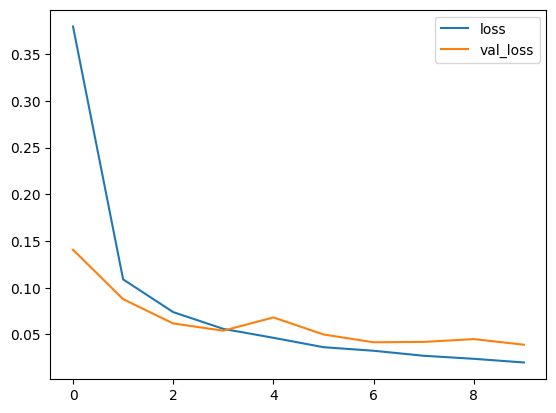

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

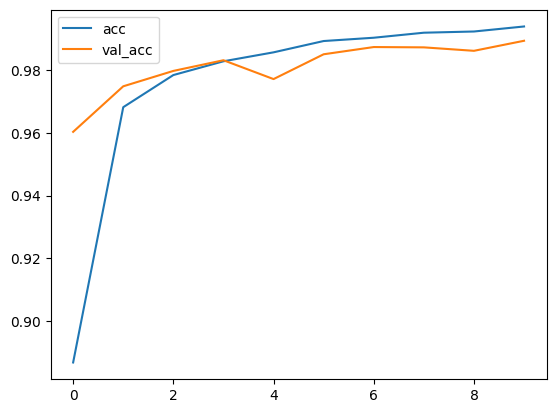

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 14ms/step - loss: 0.0390 - accuracy: 0.9893
[0.039002675563097, 0.989300012588501]


313/313 [==============================] - 6s 17ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Confusion matrix, without normalization
[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1129    2    0    0    0    1    2    1    0]
 [   1    1 1026    0    0    0    1    3    0    0]
 [   0    0    5 1000    0    1    0    0    3    1]
 [   0    0    0    1  965    0    6    2    1    7]
 [   1    0    0    3    0  879    2    1    5    1]
 [   1    2    1    0    0    1  951    0    1    1]
 [   0    8    8    1    0    0    0 1009    0    2]
 [   0    1    2    1    0    1    0    0  967    2]
 [   0    3    0    0    6    0    0    4    6  990]]


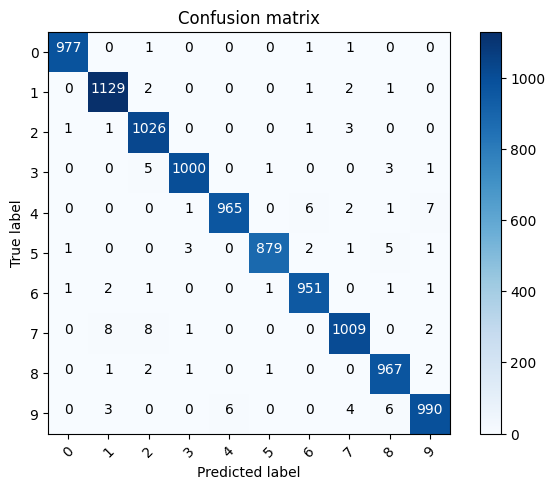

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
print(p_test)
print(y_test)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

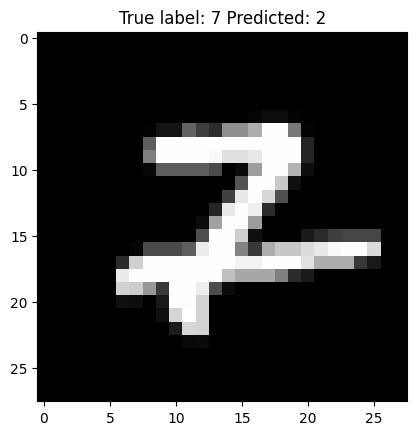

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));